<a href="https://colab.research.google.com/github/Pekayie/DCIT316/blob/main/TwitterBot_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/bot_detection_data.csv')
data.head()
#Data Cleaning
# Remove duplicate entries
data.drop_duplicates(inplace=True)

Mounted at /content/drive


In [3]:
print(data.columns)

Index(['User ID', 'Username', 'Tweet', 'Retweet Count', 'Mention Count',
       'Follower Count', 'Verified', 'Bot Label', 'Location', 'Created At',
       'Hashtags'],
      dtype='object')


In [4]:
#Data Preprocessing
#Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['Bot Label'] = label_encoder.fit_transform(data['Bot Label'])

In [5]:
# Import the necessary library
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Example sentence
sentence = "I am running and eating a better meal"

# Tokenize the sentence into words
words = sentence.split()

# Apply stemming to each word
stemmed_words = [stemmer.stem(word) for word in words]

# Join the stemmed words back into a sentence
stemmed_sentence = " ".join(stemmed_words)

print(stemmed_sentence)  # Output: "I am run and eat a better meal"

i am run and eat a better meal


In [6]:
# Import the necessary library
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example sentence
sentence = "I am running and eating a better meal"

# Process the sentence using spaCy
doc = nlp(sentence)

# Lemmatize each word and join them back into a sentence
lemmatized_sentence = " ".join([token.lemma_ for token in doc])

print(lemmatized_sentence)  # Output: "I be run and eat a good meal"

I be run and eat a well meal


In [7]:
# Import the necessary library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Example sentence
sentence = "I am running and eating a better meal"

# Tokenize the sentence into words
words = sentence.split()

# Remove the stopwords
filtered_words = [word for word in words if word.lower() not in stopwords_list]

# Join the filtered words back into a sentence
filtered_sentence = " ".join(filtered_words)

print(filtered_sentence)  # Output: "running eating better meal"

[nltk_data] Downloading package stopwords to /root/nltk_data...


running eating better meal


[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Step 4: Feature Extraction
# Example: Use TF-IDF vectorization for text features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(data['Tweet'])

In [9]:
# Step 5: Create processed dataset with cleaned and extracted features
processed_data = pd.concat([data['Bot Label'], pd.DataFrame(text_features.toarray())], axis=1)

In [10]:
# Step 6: Split the processed dataset into training and testing sets
features = processed_data.drop('Bot Label', axis=1)
labels = processed_data['Bot Label']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [11]:
# Step 7: Train the classification model
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

In [12]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, xgb_predictions)
precision = precision_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)

In [13]:
# Print the evaluation metrics
print("XGBoost Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost Evaluation Metrics:
Accuracy: 0.4958
Precision: 0.4991482112436116
Recall: 0.5822734499205088
F1-score: 0.5375160521005321


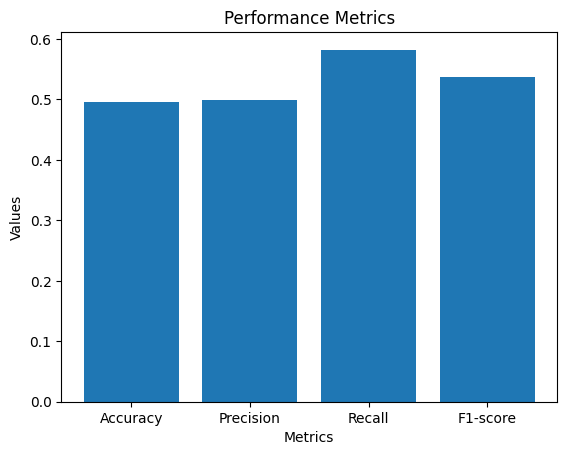

In [14]:
import matplotlib.pyplot as plt

# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Plot the bar chart
plt.bar(metrics, values)

# Add labels and a title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')

# Display the chart
plt.show()

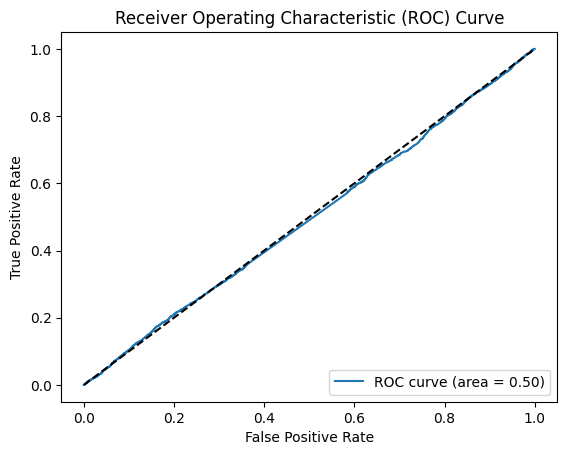

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities of the positive class
probs_positive_class = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, probs_positive_class)

# Calculate the area under the ROC curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model

# Add labels and a title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the chart
plt.show()